In [ ]:
import pandas as pd
import numpy as np
import os
import glob as gb
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/Final/ck+/train/train"
TEST_DIR = "/content/drive/MyDrive/Final/ck+/test/test"
BATCH_SIZE=64

In [ ]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 199 in folder surprise
For training data, found 69 in folder sadness
For training data, found 108 in folder anger
For training data, found 141 in folder disgust
For training data, found 60 in folder fear
For training data, found 166 in folder happy
For training data, found 43 in folder contempt


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 15 in folder fear
For testing data, found 27 in folder anger
For testing data, found 50 in folder surprise
For testing data, found 41 in folder happy
For testing data, found 15 in folder sadness
For testing data, found 11 in folder contempt
For testing data, found 36 in folder disgust


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
class_names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


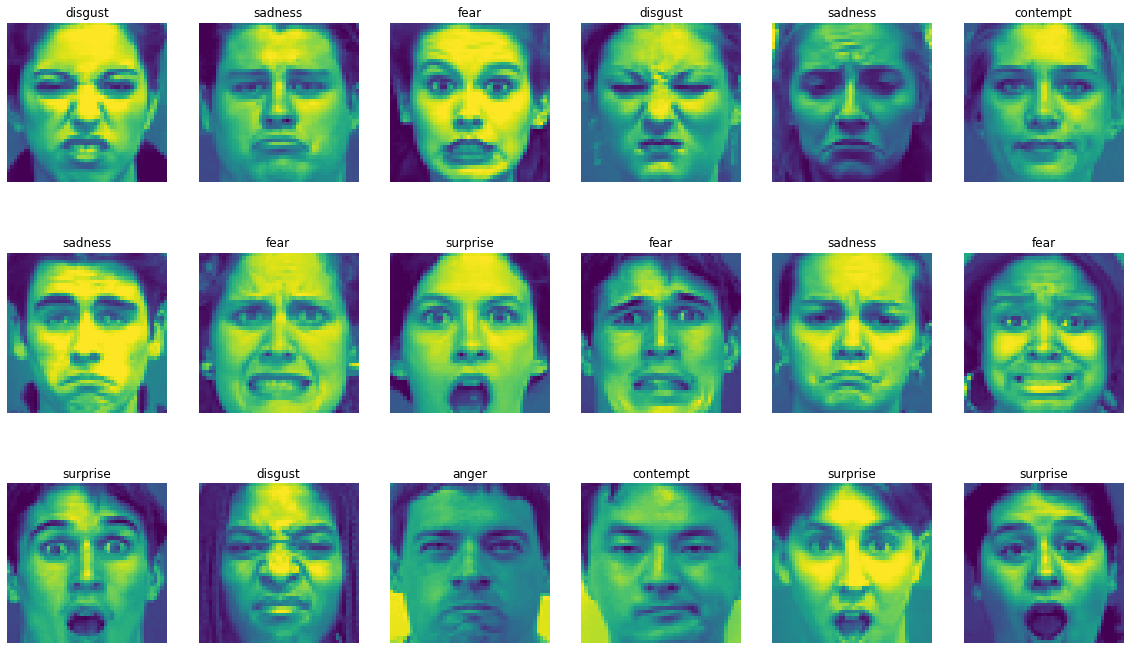

In [ ]:
plt.figure(figsize=(20,12))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/Final/ck+/train/train/", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (64, 64),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 786 images belonging to 7 classes.
Found 195 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape = (64, 64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 7, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()
history = model.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)
model.save('model_ck+.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

Text(0, 0.5, 'Accuracy')

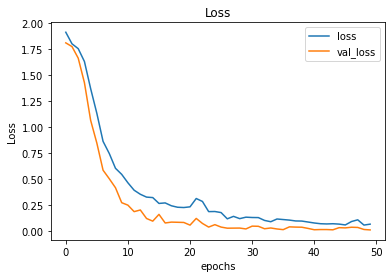

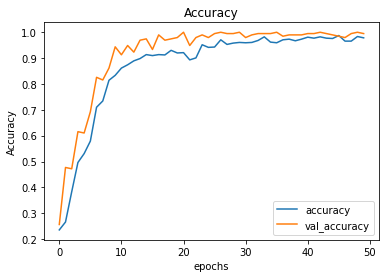

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [ ]:
model.evaluate(training_set)

13/13 [==============================] - 3s 201ms/step - loss: 0.0470 - accuracy: 0.9860


[0.04703583940863609, 0.9860050678253174]

In [ ]:
model.evaluate(test_set)

4/4 [==============================] - 0s 77ms/step - loss: 0.0109 - accuracy: 0.9949


[0.010928591713309288, 0.9948717951774597]

In [ ]:
test_set[0]

(array([[[[0.32156864, 0.32156864, 0.32156864],
          [0.22352943, 0.22352943, 0.22352943],
          [0.22352943, 0.22352943, 0.22352943],
          ...,
          [0.43921572, 0.43921572, 0.43921572],
          [0.43921572, 0.43921572, 0.43921572],
          [0.45882356, 0.45882356, 0.45882356]],
 
         [[0.30980393, 0.30980393, 0.30980393],
          [0.18431373, 0.18431373, 0.18431373],
          [0.18431373, 0.18431373, 0.18431373],
          ...,
          [0.45098042, 0.45098042, 0.45098042],
          [0.45098042, 0.45098042, 0.45098042],
          [0.47058827, 0.47058827, 0.47058827]],
 
         [[0.30980393, 0.30980393, 0.30980393],
          [0.18431373, 0.18431373, 0.18431373],
          [0.18431373, 0.18431373, 0.18431373],
          ...,
          [0.45098042, 0.45098042, 0.45098042],
          [0.45098042, 0.45098042, 0.45098042],
          [0.47058827, 0.47058827, 0.47058827]],
 
         ...,
 
         [[0.33333334, 0.33333334, 0.33333334],
          [0.29411

In [ ]:
pred=model.predict(test_set)

In [ ]:
y_test=[]

In [ ]:
for i in range (len(test_set)):
  for j in range (len(test_set[i][1])):
    y_test.append(np.argmax(test_set[i][1][j]))

In [ ]:
y_test

[2,
 2,
 4,
 0,
 4,
 5,
 0,
 6,
 3,
 2,
 6,
 5,
 6,
 0,
 6,
 5,
 2,
 6,
 1,
 6,
 3,
 6,
 4,
 4,
 6,
 2,
 0,
 0,
 6,
 6,
 3,
 6,
 6,
 3,
 2,
 2,
 6,
 0,
 1,
 4,
 4,
 6,
 6,
 6,
 3,
 1,
 3,
 0,
 2,
 5,
 0,
 6,
 4,
 6,
 2,
 4,
 4,
 4,
 6,
 1,
 3,
 6,
 6,
 0,
 4,
 0,
 6,
 0,
 4,
 5,
 6,
 5,
 0,
 0,
 0,
 3,
 6,
 5,
 4,
 4,
 4,
 6,
 2,
 4,
 6,
 2,
 6,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 3,
 4,
 1,
 4,
 4,
 4,
 2,
 3,
 2,
 5,
 0,
 5,
 4,
 1,
 6,
 4,
 2,
 2,
 4,
 6,
 4,
 5,
 2,
 6,
 1,
 2,
 2,
 2,
 2,
 2,
 6,
 3,
 3,
 4,
 6,
 4,
 2,
 6,
 0,
 6,
 0,
 6,
 6,
 2,
 2,
 0,
 5,
 3,
 6,
 4,
 4,
 0,
 4,
 6,
 6,
 1,
 6,
 6,
 2,
 4,
 2,
 6,
 4,
 4,
 5,
 2,
 4,
 2,
 2,
 4,
 6,
 6,
 6,
 5,
 3,
 5,
 2,
 2,
 5,
 3,
 4,
 2,
 0,
 6,
 1,
 6,
 0,
 2,
 4,
 4,
 1,
 6,
 4,
 0,
 4,
 4,
 4,
 2,
 2,
 6,
 6]

In [ ]:
pred=model.predict(test_set)

In [ ]:
y_pred=[]

In [ ]:
for i in range (len(pred)):
  y_pred.append(np.argmax(pred[i],axis=0))

In [ ]:
y_pred

[2,
 2,
 4,
 0,
 4,
 5,
 0,
 6,
 3,
 2,
 6,
 5,
 6,
 0,
 6,
 5,
 2,
 6,
 1,
 6,
 3,
 6,
 4,
 4,
 6,
 2,
 0,
 0,
 6,
 6,
 3,
 6,
 6,
 3,
 2,
 2,
 6,
 0,
 1,
 4,
 4,
 6,
 6,
 6,
 3,
 1,
 3,
 0,
 2,
 5,
 0,
 6,
 4,
 6,
 2,
 4,
 4,
 4,
 6,
 1,
 3,
 6,
 6,
 0,
 4,
 0,
 6,
 0,
 4,
 5,
 6,
 5,
 0,
 0,
 0,
 3,
 6,
 5,
 4,
 4,
 4,
 6,
 2,
 4,
 6,
 2,
 6,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 3,
 4,
 1,
 4,
 4,
 4,
 2,
 3,
 2,
 5,
 0,
 5,
 4,
 1,
 6,
 4,
 2,
 2,
 4,
 6,
 4,
 1,
 2,
 6,
 1,
 2,
 2,
 2,
 2,
 2,
 6,
 3,
 3,
 4,
 6,
 4,
 2,
 6,
 0,
 6,
 0,
 6,
 6,
 2,
 2,
 0,
 5,
 3,
 6,
 4,
 4,
 0,
 4,
 6,
 6,
 1,
 6,
 6,
 2,
 4,
 2,
 6,
 4,
 4,
 5,
 2,
 4,
 2,
 2,
 4,
 6,
 6,
 6,
 5,
 3,
 5,
 2,
 2,
 5,
 3,
 4,
 2,
 0,
 6,
 1,
 6,
 0,
 2,
 4,
 4,
 1,
 6,
 4,
 0,
 4,
 4,
 4,
 2,
 2,
 6,
 6]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        27
    contempt       0.92      1.00      0.96        11
     disgust       1.00      1.00      1.00        36
        fear       1.00      1.00      1.00        15
       happy       1.00      1.00      1.00        41
     sadness       1.00      0.93      0.97        15
    surprise       1.00      1.00      1.00        50

    accuracy                           0.99       195
   macro avg       0.99      0.99      0.99       195
weighted avg       1.00      0.99      0.99       195



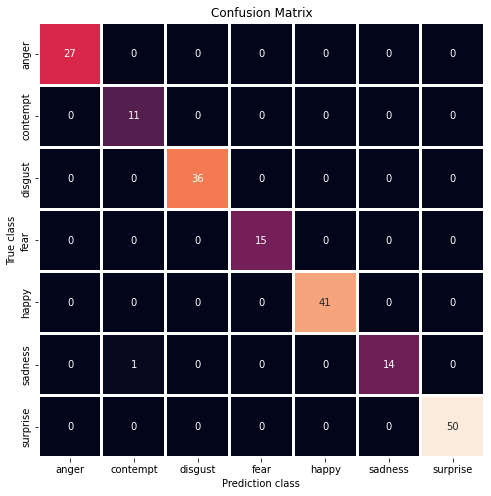

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = class_names,
                     columns = class_names
                    )
final_cm = cm_df
plt.figure(figsize = (8,8))
sns.heatmap(final_cm, annot = True,cmap='rocket',cbar=False,linewidth=2,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()